# 1. Calculation methodology

## Salary brackets
From 2024: For newcomers who became eligible from 1 January 2024 onward, the tax-exempt benefit now follows a laddered structure over the five-year period:

**30% tax-free for the first 20 months**
**20% tax-free for the next 20 months**
**10% tax-free for the final 20 months**

Applicants with a ruling in place before 2024 are grandfathered, meaning they continue to enjoy the full 30% tax-free allowance for up to five years under the old rules.But a reversal is already underway. Following widespread criticism, the government decided to reverse the 30-20-10 structure:

From 1 January 2025 through 31 December 2026, all eligible expats (including new ones) will receive a **flat 30% tax-free allowance**, without scaling. Then, starting 1 January 2027, the allowance will be permanently **adjusted to a flat 27%**, with updated salary thresholds.

The 2025 Tax Plan, including the amendments, still requires approval from the Dutch Parliament. Should the proposals be adopted, these changes may have implications for certain employees.

## Maximum allowable salary for 30% ruling

30% facility applies to amounts up to €233,000
The tax-free allowance applies to salary amounts of up to €233,000 a year (amount for 2024).

https://www.belastingdienst.nl/wps/wcm/connect/en/individuals/content/coming-to-work-in-the-netherlands-30-percent-facility


## Expertise Requirements

To qualify for the 30%-ruling, an incoming employee must possess specific expertise that is either not available or scarcely available in the Dutch labor market. This expertise requirement is primarily determined based on a salary norm.

Your specific expertise is hardly found on the labour market in the Netherlands. You have a specific expertise if your annual salary, not including the tax-free allowance in the Netherlands, is more than the annual salary in the table.

Table: specific expertise
Year	Your annual salary is more than
**2025	€46,660**
2024	€46,107
2023	€41,954

You are younger than 30, and you have a Dutch academic master's degree
Or you have obtained an equivalent title in another country. You have a specific expertise if your annual salary, not including the tax-free allowance in the Netherlands, is more than the annual salary in the table.
Table: specific expertise for people younger than 30
Year	Your annual salary is more than
**2025	€35,468**
2024	€35,048
2023	€31,891

https://www.belastingdienst.nl/wps/wcm/connect/en/individuals/content/coming-to-work-in-the-netherlands-30-percent-facility




# 2.Data Schema

### Data Inputs

Age: integer  
Base_salary: Gross, expected to earn once relocated  
Duration_years: Expected to remain in the Netherlands, if omitted  assumed 10 years  
Start_Date: Date when expected to start the job
Expertise: Boolean (if posseses specific expertise not available)  
Master_dpl: Boolean (if possesses Dutch academic master degree)

### Parameters
Salary_cap: Maximum salary on which 30% ruling is applied  
Salary_req_young: Salary requirements young professional
Salary_expert: Salary for employee with specific expertise

### Function

Function will consume data inputs and parameters and will return a  
dictionary of values for each subsequential year employee will work in  
the Netherlands and the respective Gross Salary which will be taxed







---



In [20]:
import pandas as pd
import datetime

from datetime import datetime, date, time, timedelta
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
def apply_ruling(base_salary: float, months_dur: int, year: int, year_seq: int):
  # base_salary -> annual
  # function derives gross salary net of 30% taxes
  # months_dur -> months when 30% ruling will be applied
  # year_seq: which year we deal with: 0 -> first, 1 -> intermeidate year, 2-> last, 3-> no 30% ruling

    if year in (2025, 2026) and year_seq == 0 and months_dur != 12:
      # 30% ruling on months applied
      gross_taxable = (base_salary - (base_salary * 0.3)) / 12 * months_dur
    elif year in (2025, 2026) and year_seq == 1:
      # in case 2025, 2025 not first year -> full year 30% ruling
      gross_taxable = base_salary - (base_salary * 0.3)
    elif year not in (2025, 2026) and year_seq == 1:
      # in case 2026 or later and 27% ruling whole year
      gross_taxable = base_salary - (base_salary * 0.27)
    elif year not in (2025, 2026) and year_seq == 2:
      # in case 2026 or later and 30% ruling part of the year
      gross_taxable = ((base_salary - (base_salary * 0.3)) / 12 * months_dur) + (base_salary / 12 * (12 - months_dur))
    else:
      # no 30% ruling and year later than 2026
      gross_taxable = base_salary

    return gross_taxable

In [22]:
# apply_ruling(55000, 3, 2025, 0)

In [23]:
def expat_ruling_calc(age: int, base_salary: float, date_string: str, duration: int = 10,
                      expertise: bool = False, master_dpl: bool = False):

  # INITIATE KEY PARAMETERS
  salary_cap = 233000
  salary_req_young = 35468
  salary_expert = 46660

  # DETERMINE MONTHS REMAINING IN FIRST YEAR & LAST YEAR
  # date_string = "2024-12-25"

  start_date = datetime.strptime(date_string, "%Y-%m-%d")

  # DETERMINE CURRENT YEAR
  current_year = start_date.year

  months_remaining_init = 12 - start_date.month + 1
  months_remaining_final = 12 - months_remaining_init

  # YEARS SEQUENCE
  # CREATE A SEQUENCE OF YEARS EXPECTED TO BE EMPLOYED IN NL
  # CREATE DICTIONARY TO KEEP VALUES IN

  years_sequence = list(range(current_year, current_year + duration))
  my_dict = {}
  my_key = years_sequence

  for key in my_key:
    my_dict[key] = ""

  # CHECK IF 30% RULING WILL APPLY

  if age < 30 and expertise == True and master_dpl == True and base_salary >= salary_req_young:
        Ruling_test = True
  elif age >= 30 and expertise == True and base_salary >= salary_expert:
        Ruling_test = True
  else:
        Ruling_test = False

  # CALCULATION BASE

  if base_salary > salary_cap:
    base_salary = salary_cap
  else:
    base_salary = base_salary

  keys_list = list(my_dict.keys())  # Get the tuple
  keys = list(keys_list)  # Convert tuple to list: ['A', 'B', 'C']

  # CHECKING IF THERE IS A BROKEN YEAR AND CALCULATING THESE PARTS #
  ##################################################################

  if Ruling_test == True:
    # months_remaining_init != 12 and Ruling_test == True:
    # if start date not January

    year1 = apply_ruling(base_salary, months_remaining_init, int(keys_list[0]), 0)
    year5 = apply_ruling(base_salary, months_remaining_final, int(keys_list[4]), 2)
    my_dict[keys[0]] = year1
    my_dict[keys[4]] = year5

    # other years -not first and last years
    other_years_sequence = list(keys_list[1:4])

    for key in other_years_sequence:
      if key >= 2027:
        # new 27% ruling
        my_dict[key] = apply_ruling(base_salary, 12, int(key), 1)
      else:
        # apply 30% ruling
        my_dict[key] = apply_ruling(base_salary, 12, int(key), 1)

    # populating remainder of the dictionary - no ruling
    for key in keys_list[5:]:
      my_dict[key] = float(base_salary)

    return my_dict

  else:
    # not applicable - not fulfilling conditions
    # populating remainder of the dictionary - no ruling
    for key in keys_list:
      my_dict[key] = float(base_salary)

    return my_dict


In [77]:
my_dict = expat_ruling_calc(25, 37000, "2025-10-01", 8, True, True)


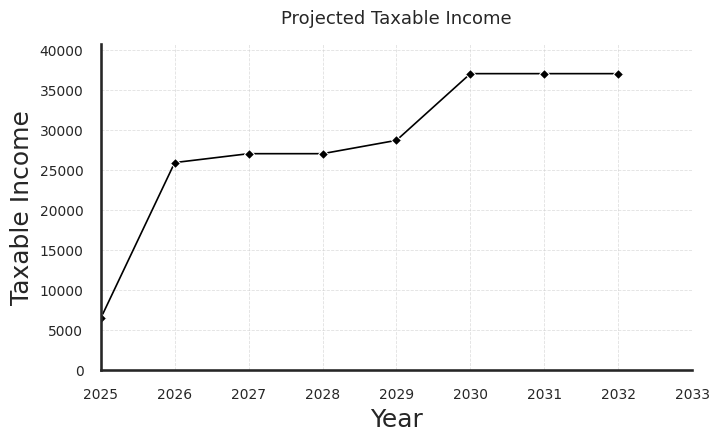

In [78]:
sns.set_theme(style="white", context="talk")

# Line with diamond markers
g = sns.relplot(
    data=df, kind="line",
    x="Year", y="Taxable Income",
    linewidth=1.2, color="black",
    marker="D",                 # diamond marker
    markersize=5,               # smaller, subtle size
    height=4.5, aspect=1.7
)

# Refine axes
ax = g.ax
ax.set_xlim(df["Year"].min(), df["Year"].max()+1)
ax.set_ylim(0, df["Taxable Income"].max() * 1.1)

ax.set_xlabel("Year")
ax.set_ylabel("Taxable Income")
ax.set_title("Projected Taxable Income", fontsize=13, weight="medium", pad=15)

# Subtle grid + ticks
ax.grid(True, which="major", linestyle="--", linewidth=0.6, alpha=0.6)
ax.tick_params(axis="both", which="major", labelsize=10, direction="out")

plt.show()